# Spliting Data, EDA, Feature Engineering and Selection

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import RFE
from mlxtend.feature_selection import ExhaustiveFeatureSelector
from sklearn.feature_selection import SelectFromModel

from sklearn.preprocessing import MinMaxScaler

In [2]:
df_mf = pd.read_csv('../Data/US_mutual_fund_data_cleaned')

### Remove features that are directly derived from or indicative of past performance (target) - if you have a brand new mutual fund, will this feature still be available? Can you set the feature at the fund inception? (e.g., turnover ratio)

In [3]:
df_mf.drop(['Morningstar Risk','Dividend Yield (%)','% of Holdings in Cash','Price/Earnings','Price/Cash Flow'], axis=1, inplace=True)

In [4]:
df_mf

,Ticker,Morningstar Sustainability Rating,Average Market Cap ($ mil),ROE Last Year (%),Debt/Capital Last Year (%),No. of Holdings in Portfolio,% Assets in Top 10 Holdings,Turnover Ratio (%),Average Manager Tenure (years),Expense Ratio (%),No-load Funds,Minimum Initial Purchase ($),Total Assets ($ mil),Closed to New Investors,3-year Annualized Return vs. S&P500,Outperform / Underperform
0,AAAGX,3,294701,31.56,44.55,45,55.73,58,2,1.14,No,2000,1768,No,9.29,1
1,AACIX,2,8740,2.21,48.49,124,18.37,35,6,0.95,Yes,250000,195,No,-11.03,0
2,AADEX,2,57742,12.54,48.12,168,21.82,67,12,0.63,Yes,250000,4242,No,-7.18,0
3,AADGX,3,14323,26.21,40.21,51,24.66,47,5,1.08,Yes,2500,70,No,-4.99,0
4,AAGOX,2,152652,21.25,36.98,59,47.30,144,19,0.89,Yes,0,446,No,16.63,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6011,ZSCIX,2,1408,5.38,32.21,103,19.62,114,10,1.14,Yes,5000,49,No,-9.36,0
6012,ZVGIX,1,62304,3.79,38.04,32,56.64,62,5,1.10,Yes,50000,208,No,35.55,1
6013,ZVGNX,1,62304,3.79,38.04,32,56.64,62,5,1.40,Yes,2500,208,No,34.93,1
6014,ZVNBX,1,67296,3.94,39.47,36,50.07,39,5,1.30,Yes,2500,129,No,33.87,1


### Train Test split - hold out 20% of data for final testing

In [5]:
X = df_mf.drop('Outperform / Underperform', axis=1)
y = df_mf['Outperform / Underperform']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    random_state=10)

In [6]:
df_mf_train = pd.concat([X_train, y_train], axis=1).reset_index(drop=True)

In [7]:
df_mf_train.head()

,Ticker,Morningstar Sustainability Rating,Average Market Cap ($ mil),ROE Last Year (%),Debt/Capital Last Year (%),No. of Holdings in Portfolio,% Assets in Top 10 Holdings,Turnover Ratio (%),Average Manager Tenure (years),Expense Ratio (%),No-load Funds,Minimum Initial Purchase ($),Total Assets ($ mil),Closed to New Investors,3-year Annualized Return vs. S&P500,Outperform / Underperform
0,VFTNX,4,183202,28.22,45.19,470,30.13,18,5,0.12,Yes,5000000,10798,No,4.48,1
1,FTRIX,2,181538,21.38,46.48,81,38.76,49,8,0.65,Yes,0,1292,No,-1.32,0
2,PSIAX,3,178097,27.38,45.62,511,26.50,2,12,0.53,No,1000,818,No,1.04,1
3,NSIDX,2,2438,-1.30,37.91,2044,4.06,18,8,0.15,Yes,2500,1561,No,0.97,1
4,TIGRX,2,119787,23.15,44.32,182,28.55,64,16,0.40,Yes,2000000,5988,No,0.88,1


In [8]:
df_mf_test = pd.concat([X_test, y_test], axis=1).reset_index(drop=True)

In [9]:
df_mf_test.head()

,Ticker,Morningstar Sustainability Rating,Average Market Cap ($ mil),ROE Last Year (%),Debt/Capital Last Year (%),No. of Holdings in Portfolio,% Assets in Top 10 Holdings,Turnover Ratio (%),Average Manager Tenure (years),Expense Ratio (%),No-load Funds,Minimum Initial Purchase ($),Total Assets ($ mil),Closed to New Investors,3-year Annualized Return vs. S&P500,Outperform / Underperform
0,FGRTX,2,181538,21.38,46.48,81,38.76,49,8,0.64,Yes,0,1292,No,-1.30,0
1,VYMVX,3,7018,12.10,39.72,369,8.59,51,4,1.21,No,0,130,No,-6.44,0
2,ACAAX,3,262842,26.68,39.22,80,51.87,90,11,1.17,No,1000,3100,No,8.98,1
3,FWWMX,2,117267,20.76,46.39,182,30.64,30,9,0.33,Yes,250,138572,No,-2.72,0
4,LAVRX,2,64834,22.20,47.85,75,22.34,59,2,1.19,No,0,1832,No,-8.19,0


### Remove mutual funds with similar performance as S&P500 to give better separation (Outperform/Underperform by +/- 2%)

In [10]:
df_mf_train = df_mf_train[(df_mf_train['3-year Annualized Return vs. S&P500']>=2) | 
                          (df_mf_train['3-year Annualized Return vs. S&P500']<=-2)].reset_index(drop=True)

In [11]:
df_mf_train

,Ticker,Morningstar Sustainability Rating,Average Market Cap ($ mil),ROE Last Year (%),Debt/Capital Last Year (%),No. of Holdings in Portfolio,% Assets in Top 10 Holdings,Turnover Ratio (%),Average Manager Tenure (years),Expense Ratio (%),No-load Funds,Minimum Initial Purchase ($),Total Assets ($ mil),Closed to New Investors,3-year Annualized Return vs. S&P500,Outperform / Underperform
0,VFTNX,4,183202,28.22,45.19,470,30.13,18,5,0.12,Yes,5000000,10798,No,4.48,1
1,JCNNX,1,19870,10.25,48.60,45,44.05,68,4,0.58,Yes,1000000,3785,No,7.61,1
2,PMJPX,4,1830,0.62,46.75,782,12.57,202,6,0.63,Yes,1000000,552,No,-4.02,0
3,WMICX,2,1264,-6.53,30.18,75,25.07,75,10,1.66,Yes,2000,1410,No,23.85,1
4,STAEX,3,178923,24.25,45.50,39,47.94,16,8,1.02,No,1000,287,No,9.69,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3952,SASCX,2,1257,2.15,36.92,2027,9.58,68,0,1.90,No,500,43,No,-5.90,0
3953,GPSCX,1,3638,-8.33,43.24,41,38.97,89,9,1.26,No,2500,89,Yes,8.04,1
3954,MFVAX,3,118460,24.13,51.41,71,37.72,41,4,1.29,No,0,762,No,-3.24,0
3955,RFNCX,2,104576,18.85,43.92,327,23.69,40,9,0.94,No,250,117632,No,-2.51,0


## EDA - create plots to analyze relationships between features and target

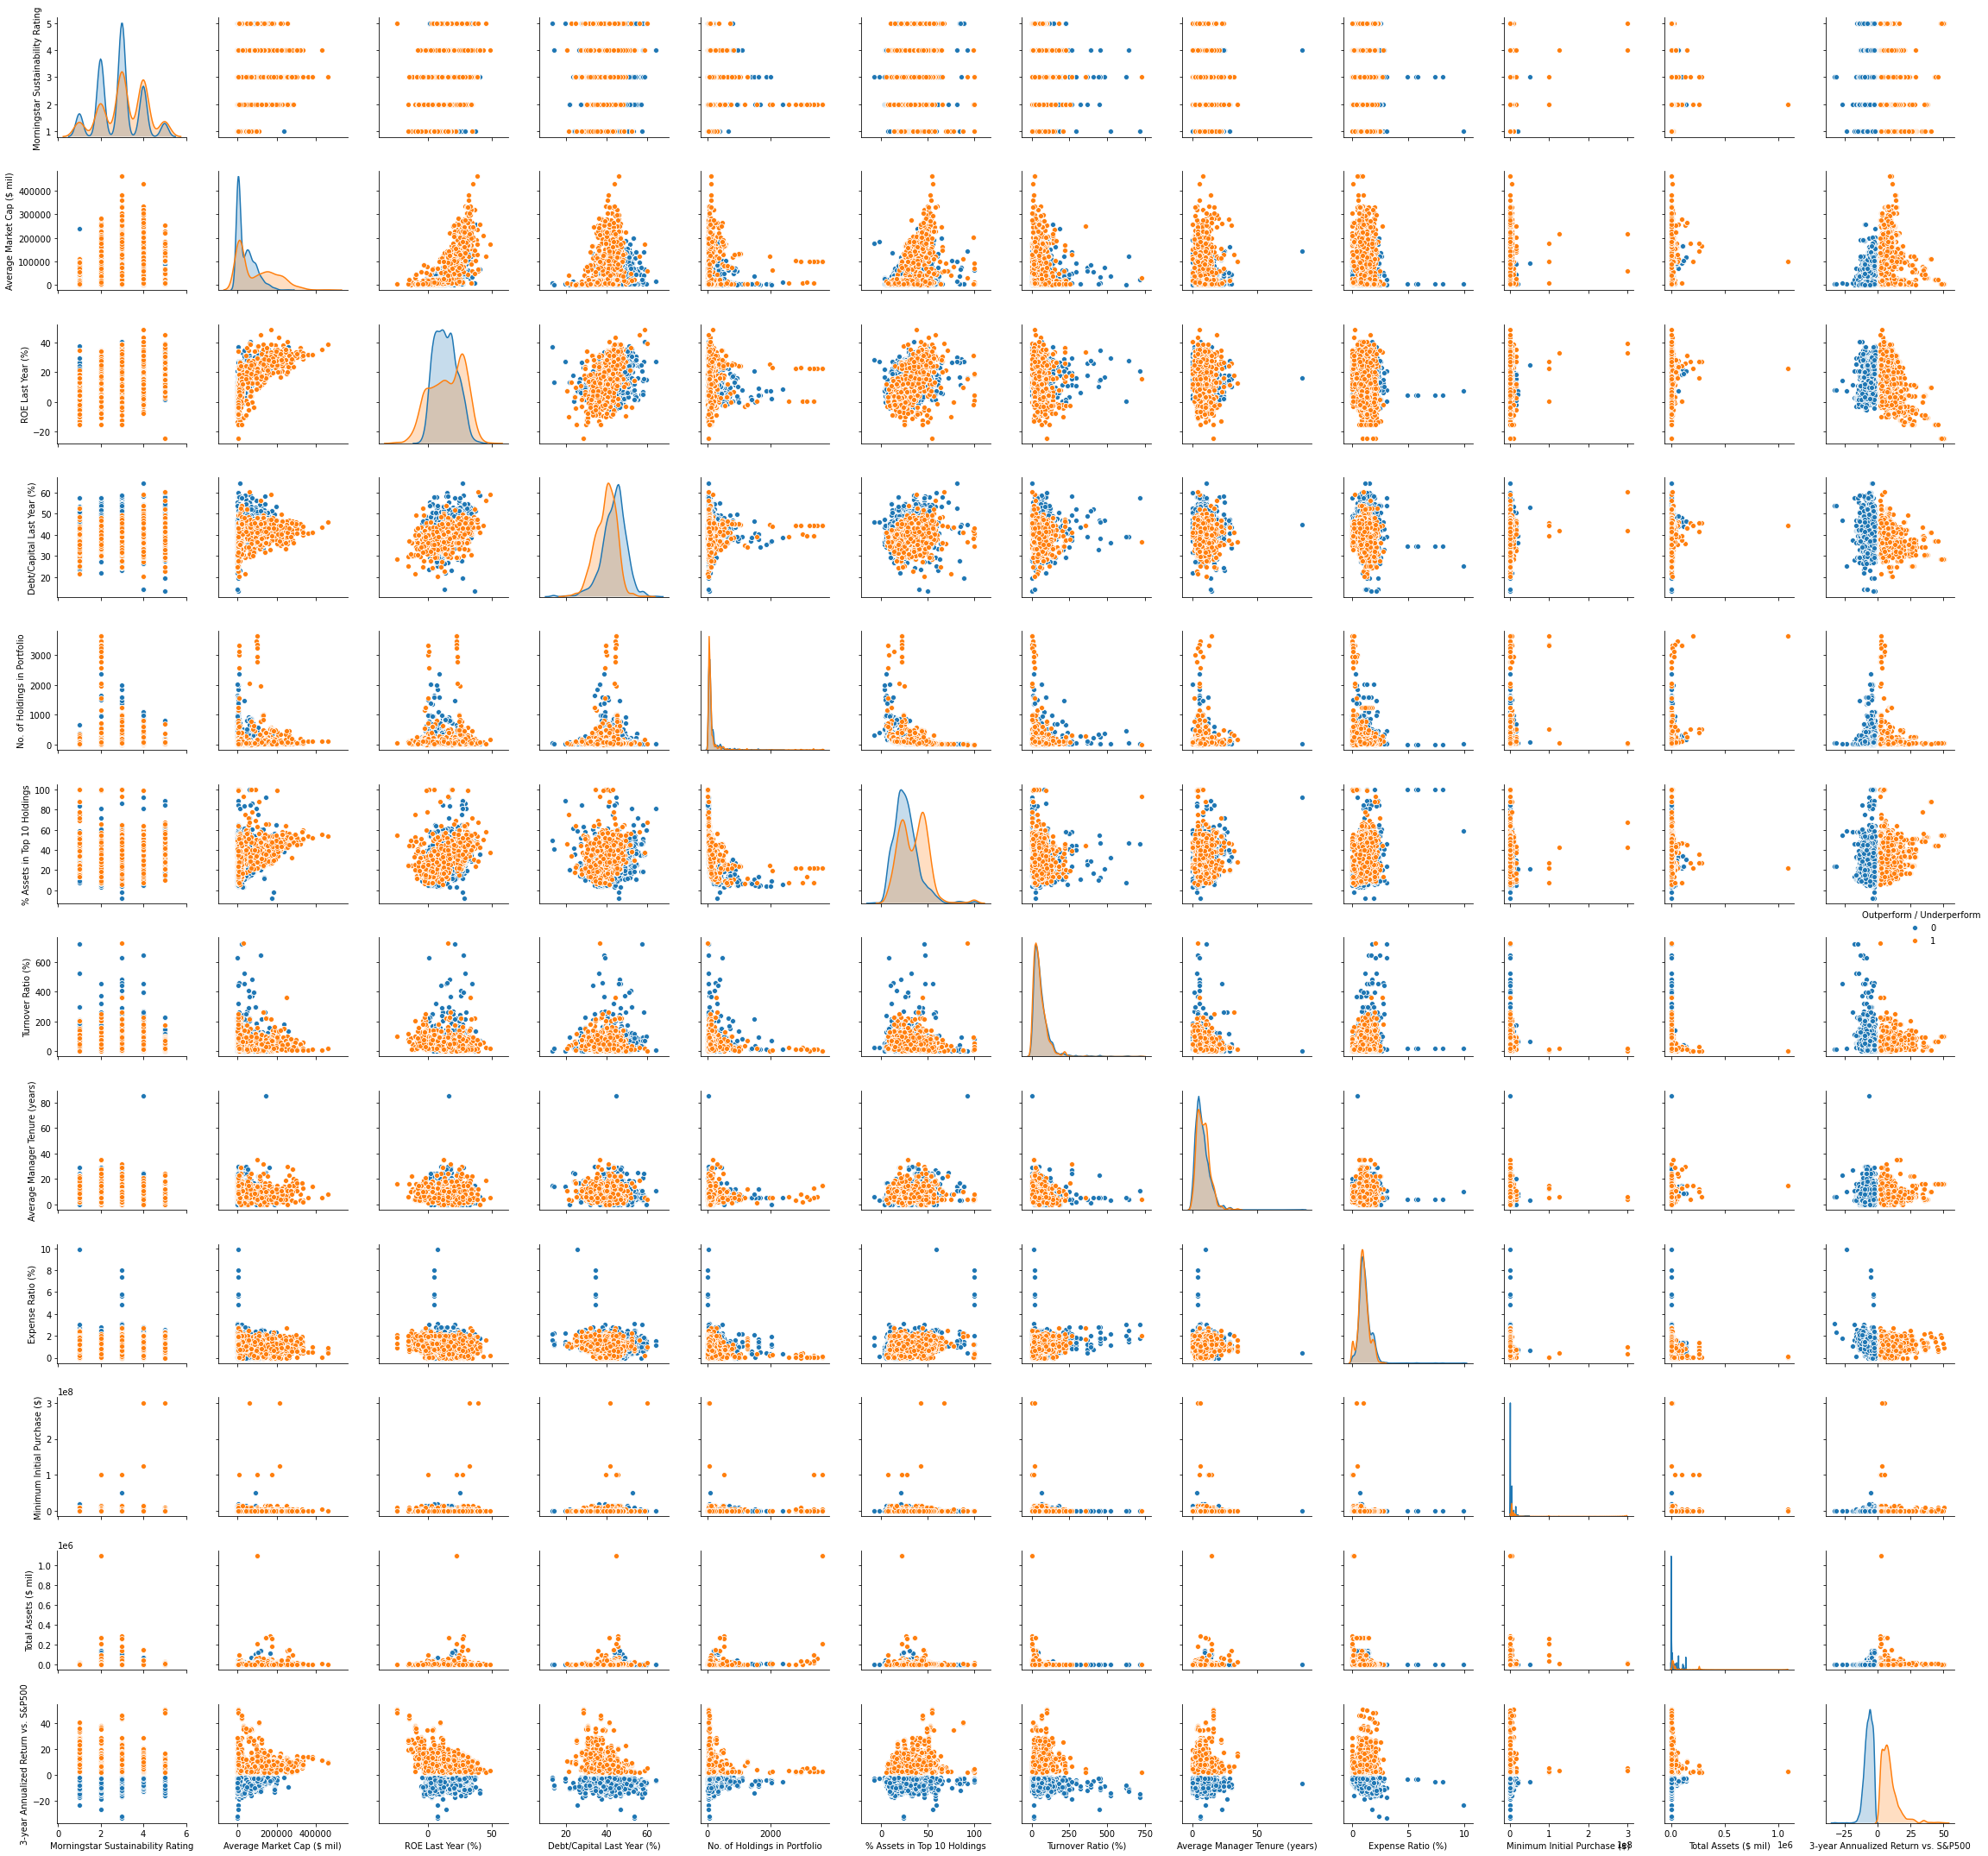

In [12]:
sns.pairplot(df_mf_train, hue='Outperform / Underperform')
plt.tight_layout()
plt.savefig('../Charts/pairplot.png')

### Distribution plots for each numerical feature, separated by target labels

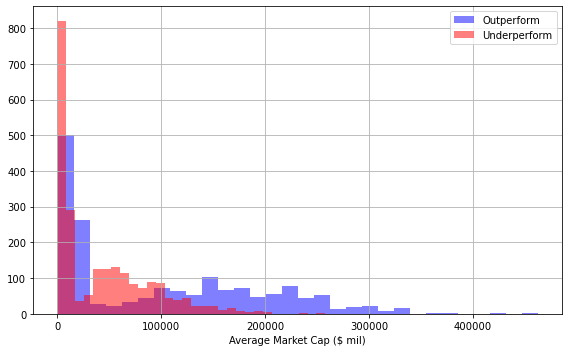

In [13]:
plt.figure(figsize=(8,5))
df_mf_train[df_mf_train['Outperform / Underperform']==1]['Average Market Cap ($ mil)'].hist(alpha=0.5,
                                              color='blue', bins=30,label='Outperform')
df_mf_train[df_mf_train['Outperform / Underperform']==0]['Average Market Cap ($ mil)'].hist(alpha=0.5,
                                              color='red', bins=30,label='Underperform')
plt.legend()
plt.xlabel('Average Market Cap ($ mil)')
plt.tight_layout()
plt.savefig('../Charts/dist_avg_market_cap.png')

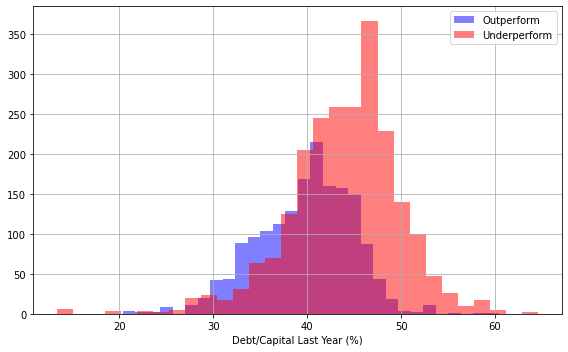

In [14]:
plt.figure(figsize=(8,5))
df_mf_train[df_mf_train['Outperform / Underperform']==1]['Debt/Capital Last Year (%)'].hist(alpha=0.5,
                                              color='blue', bins=30,label='Outperform')
df_mf_train[df_mf_train['Outperform / Underperform']==0]['Debt/Capital Last Year (%)'].hist(alpha=0.5,
                                              color='red', bins=30,label='Underperform')
plt.legend()
plt.xlabel('Debt/Capital Last Year (%)')
plt.tight_layout()
plt.savefig('../Charts/dist_debt_to_capital.png')

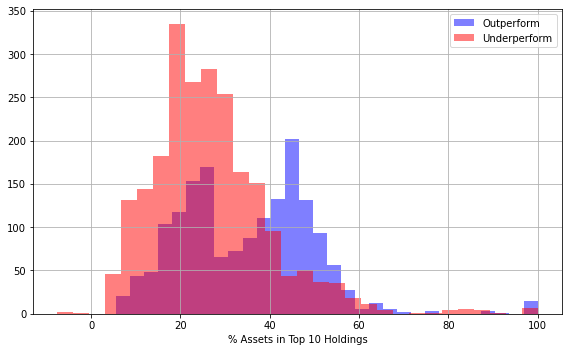

In [15]:
plt.figure(figsize=(8,5))
df_mf_train[df_mf_train['Outperform / Underperform']==1]['% Assets in Top 10 Holdings'].hist(alpha=0.5,
                                              color='blue', bins=30,label='Outperform')
df_mf_train[df_mf_train['Outperform / Underperform']==0]['% Assets in Top 10 Holdings'].hist(alpha=0.5,
                                              color='red', bins=30,label='Underperform')
plt.legend()
plt.xlabel('% Assets in Top 10 Holdings')
plt.tight_layout()
plt.savefig('../Charts/dist_%assets_top10.png')

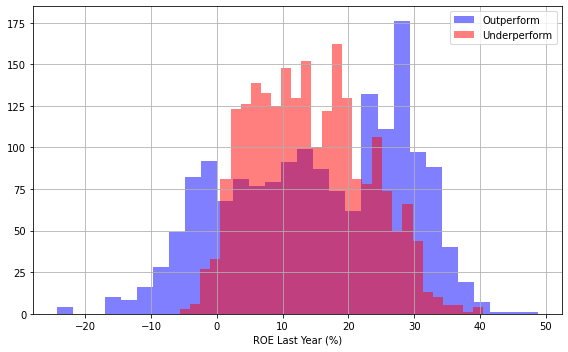

In [16]:
plt.figure(figsize=(8,5))
df_mf_train[df_mf_train['Outperform / Underperform']==1]['ROE Last Year (%)'].hist(alpha=0.5,
                                              color='blue', bins=30,label='Outperform')
df_mf_train[df_mf_train['Outperform / Underperform']==0]['ROE Last Year (%)'].hist(alpha=0.5,
                                              color='red', bins=30,label='Underperform')
plt.legend()
plt.xlabel('ROE Last Year (%)')
plt.tight_layout()
plt.savefig('../Charts/dist_ROE.png')

### Count plots for each categorical feature, separated by target labels

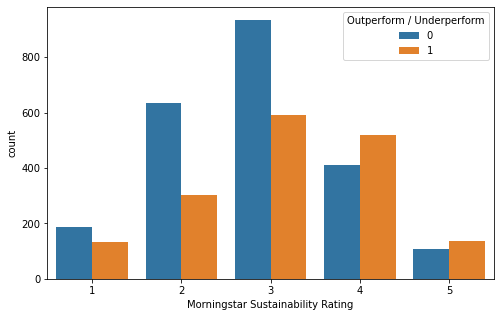

In [17]:
plt.figure(figsize=(8,5))
sns.countplot('Morningstar Sustainability Rating', data=df_mf_train, hue='Outperform / Underperform')

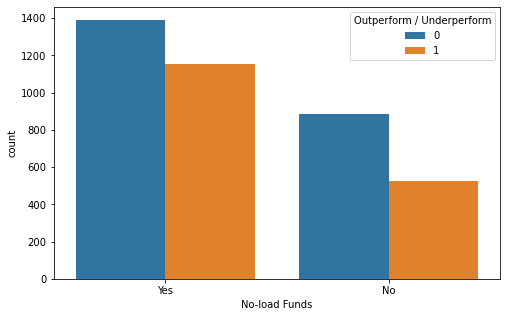

In [18]:
plt.figure(figsize=(8,5))
sns.countplot('No-load Funds', data=df_mf_train, hue='Outperform / Underperform')

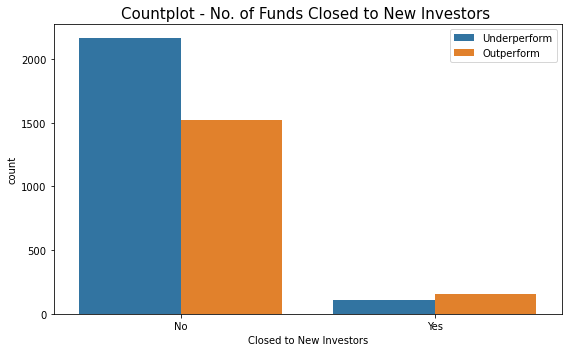

In [19]:
plt.figure(figsize=(8,5))
cp = sns.countplot('Closed to New Investors', data=df_mf_train, hue='Outperform / Underperform')
legend_labels, _= cp.get_legend_handles_labels()
cp.legend(legend_labels, ['Underperform','Outperform'])
plt.title('Countplot - No. of Funds Closed to New Investors ', fontsize=15)
plt.tight_layout()
plt.savefig('../Charts/count_closed_to_new.png')

## Feature Engineering

### Convert categorical features to dummy variables

In [20]:
no_load_train = pd.get_dummies(df_mf_train['No-load Funds'], drop_first=True)
closed_train = pd.get_dummies(df_mf_train['Closed to New Investors'], drop_first=True)

no_load_test = pd.get_dummies(df_mf_test['No-load Funds'], drop_first=True)
closed_test = pd.get_dummies(df_mf_test['Closed to New Investors'], drop_first=True)

In [21]:
df_mf_train.drop(['No-load Funds','Closed to New Investors'], axis=1, inplace=True)
df_mf_test.drop(['No-load Funds','Closed to New Investors'], axis=1, inplace=True)

In [22]:
df_mf_train = pd.concat([df_mf_train, no_load_train, closed_train], axis=1)
df_mf_test = pd.concat([df_mf_test, no_load_test, closed_test], axis=1)

In [23]:
df_mf_train.columns = ['Ticker','Morningstar Sustainability Rating','Average Market Cap ($ mil)','ROE Last Year (%)',
                       'Debt/Capital Last Year (%)','No. of Holdings in Portfolio','% Assets in Top 10 Holdings',
                       'Turnover Ratio (%)','Average Manager Tenure (years)','Expense Ratio (%)',
                       'Minimum Initial Purchase ($)','Total Assets ($ mil)','3-year Annualized Return vs. S&P500',
                       'Outperform / Underperform','No-load Funds','Closed to New Investors']

df_mf_test.columns = ['Ticker','Morningstar Sustainability Rating','Average Market Cap ($ mil)','ROE Last Year (%)',
                       'Debt/Capital Last Year (%)','No. of Holdings in Portfolio','% Assets in Top 10 Holdings',
                       'Turnover Ratio (%)','Average Manager Tenure (years)','Expense Ratio (%)',
                       'Minimum Initial Purchase ($)','Total Assets ($ mil)','3-year Annualized Return vs. S&P500',
                       'Outperform / Underperform','No-load Funds','Closed to New Investors']

### Binning continuous features and other feature engineering techniques

## Feature selection

In [24]:
X_train_base = df_mf_train.drop(['Ticker','3-year Annualized Return vs. S&P500','Outperform / Underperform'], axis=1)
y_train_base = df_mf_train['Outperform / Underperform']

X_test_base = df_mf_test.drop(['Ticker','3-year Annualized Return vs. S&P500','Outperform / Underperform'], axis=1)
y_test_base = df_mf_test['Outperform / Underperform']

### Removing features with low variance

In [25]:
X_train_base.shape

(3957, 13)

In [26]:
sel_variance_threshold = VarianceThreshold()

In [27]:
X_train_base_remove_variance = sel_variance_threshold.fit_transform(X_train_base)
print(X_train_base_remove_variance.shape)

(3957, 13)


### Univariate feature selection

#### (1) Chi-square test

In [28]:
sel_chi2 = SelectKBest(chi2, k=5)

In [29]:
scaler_minmax = MinMaxScaler()
X_train_base_scaled = scaler_minmax.fit_transform(X_train_base)

X_train_base_chi2 = sel_chi2.fit_transform(X_train_base_scaled, y_train_base)
df_chi2 = pd.DataFrame(sel_chi2.get_support(), index=X_train_base.columns, columns=['Chi2'])

In [30]:
df_chi2

,Chi2
Morningstar Sustainability Rating,True
Average Market Cap ($ mil),True
ROE Last Year (%),False
Debt/Capital Last Year (%),True
No. of Holdings in Portfolio,False
% Assets in Top 10 Holdings,True
Turnover Ratio (%),False
Average Manager Tenure (years),False
Expense Ratio (%),False
Minimum Initial Purchase ($),False


#### (2) f test

In [31]:
sel_f = SelectKBest(f_classif, k=5)

In [32]:
X_train_base_f = sel_f.fit_transform(X_train_base, y_train_base)
df_f = pd.DataFrame(sel_f.get_support(), index=X_train_base.columns, columns=['f'])

In [33]:
df_f

,f
Morningstar Sustainability Rating,True
Average Market Cap ($ mil),True
ROE Last Year (%),False
Debt/Capital Last Year (%),True
No. of Holdings in Portfolio,False
% Assets in Top 10 Holdings,True
Turnover Ratio (%),False
Average Manager Tenure (years),False
Expense Ratio (%),True
Minimum Initial Purchase ($),False


#### (3) mutual_info_classif test

In [34]:
sel_mutual = SelectKBest(mutual_info_classif, k=5)

In [35]:
X_train_base_mutual = sel_mutual.fit_transform(X_train_base, y_train_base)
df_mutual = pd.DataFrame(sel_mutual.get_support(), index=X_train_base.columns, columns=['mutual'])

In [36]:
df_mutual

,mutual
Morningstar Sustainability Rating,False
Average Market Cap ($ mil),True
ROE Last Year (%),True
Debt/Capital Last Year (%),True
No. of Holdings in Portfolio,False
% Assets in Top 10 Holdings,True
Turnover Ratio (%),False
Average Manager Tenure (years),False
Expense Ratio (%),False
Minimum Initial Purchase ($),False


### Wrapper methods

#### Recursive feature selection - random forest

In [37]:
model_tree = RandomForestClassifier(random_state=100, n_estimators=50)

In [38]:
sel_rfe_tree = RFE(estimator=model_tree, n_features_to_select=5, step=1)

In [39]:
X_train_base_rfe_tree = sel_rfe_tree.fit_transform(X_train_base, y_train_base)
df_rfe_tree = pd.DataFrame(sel_rfe_tree.get_support(), index=X_train_base.columns, columns=['rfe_tree'])

In [40]:
df_rfe_tree

,rfe_tree
Morningstar Sustainability Rating,False
Average Market Cap ($ mil),True
ROE Last Year (%),True
Debt/Capital Last Year (%),True
No. of Holdings in Portfolio,False
% Assets in Top 10 Holdings,True
Turnover Ratio (%),False
Average Manager Tenure (years),False
Expense Ratio (%),False
Minimum Initial Purchase ($),False


#### Exhaustive feature selection

In [41]:
# efs = ExhaustiveFeatureSelector(RandomForestClassifier(), min_features = 5, max_features = 5, scoring='accuracy', cv=5)

In [42]:
# efs = efs.fit(X_train_base, y_train_base)

In [43]:
# selected_features = efs.best_feature_names_

In [44]:
# print(selected_features)
# print(efs.best_score_)

### Feature selection using SelectFromModel

#### Tree-based feature selection

In [45]:
model_tree_sfm = RandomForestClassifier(random_state=100, n_estimators=50)

In [46]:
model_tree_sfm.fit(X_train_base, y_train_base)
print(model_tree_sfm.feature_importances_)

[0.04078704 0.22760897 0.13852417 0.1900852  0.06011103 0.11122325
 0.04868761 0.03967561 0.03136415 0.01184348 0.09260009 0.00320158
 0.00428782]


In [47]:
sel_model_tree = SelectFromModel(estimator=model_tree_sfm, prefit=True, threshold='mean')

In [48]:
X_train_base_sfm_tree = sel_model_tree.transform(X_train_base)
df_sfm_tree = pd.DataFrame(sel_model_tree.get_support(), index=X_train_base.columns, columns=['sfm_tree'])

In [49]:
df_sfm_tree

,sfm_tree
Morningstar Sustainability Rating,False
Average Market Cap ($ mil),True
ROE Last Year (%),True
Debt/Capital Last Year (%),True
No. of Holdings in Portfolio,False
% Assets in Top 10 Holdings,True
Turnover Ratio (%),False
Average Manager Tenure (years),False
Expense Ratio (%),False
Minimum Initial Purchase ($),False


## Create and save different feature-target combinations

### Baseline model - all initial features

In [50]:
df_mf_train.to_csv('../Data/df_mf_train.csv', index=False)
df_mf_test.to_csv('../Data/df_mf_test.csv', index=False)

### Model set 2 - select the top three overlapping features from the feature selection methods

In [51]:
df2_mf_train = df_mf_train[['Ticker', 'Average Market Cap ($ mil)', 'Debt/Capital Last Year (%)',
                            '% Assets in Top 10 Holdings','3-year Annualized Return vs. S&P500',
                            'Outperform / Underperform']]

df2_mf_test = df_mf_test[['Ticker', 'Average Market Cap ($ mil)', 'Debt/Capital Last Year (%)',
                            '% Assets in Top 10 Holdings','3-year Annualized Return vs. S&P500',
                            'Outperform / Underperform']]

In [52]:
df2_mf_train.to_csv('../Data/df2_mf_train.csv', index=False)
df2_mf_test.to_csv('../Data/df2_mf_test.csv', index=False)

### Model set 3 - add two more features

In [53]:
df3_mf_train = df_mf_train[['Ticker', 'Average Market Cap ($ mil)', 'ROE Last Year (%)', 'Debt/Capital Last Year (%)',
                            '% Assets in Top 10 Holdings','Closed to New Investors',
                            '3-year Annualized Return vs. S&P500','Outperform / Underperform']]

df3_mf_test = df_mf_test[['Ticker', 'Average Market Cap ($ mil)', 'ROE Last Year (%)', 'Debt/Capital Last Year (%)',
                            '% Assets in Top 10 Holdings','Closed to New Investors',
                            '3-year Annualized Return vs. S&P500','Outperform / Underperform']]

In [54]:
df3_mf_train.to_csv('../Data/df3_mf_train.csv', index=False)
df3_mf_test.to_csv('../Data/df3_mf_test.csv', index=False)